<a href="https://colab.research.google.com/github/harnalashok/timeseries/blob/main/panama%20electricity%20demand%20forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 19th Feb, 2023
# Ref: https://www.kaggle.com/code/pateljay731/multivariate-time-series-forecasting/notebook

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten

# Timeseries Multivariant Forecasting with LSTM model

This notebook is about forecasting of the timeseries Load data avaialable in Train.csv.
The change in Load is depend on the multiple variables like Temp, Humidity, Wind and Precipitation.

We will train a LSTM model, which will take  hourly records available from 2015 to 2019.
Then, we will predict the future demand for Jan-2020 and Compare with actual data that how model has worked...

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
path = "/gdrive/MyDrive/Colab_data_files/panamaelectricityload/"

In [8]:
df = pd.read_csv(path+ "train.csv.zip")

In [9]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
print(df.dtypes)

It seems that there is no NULL values..Great...!!!

In [11]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

From above- There are not Categorical dataset only Numerical dataset.
But datetime column data type is object. Needs to be change

In [12]:
df['datetime']=pd.to_datetime(df['datetime'])

In [13]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


datetime columne is directly can not be used for the Modem building but the we can create a features that repeated in nature any give that to the model so model can identify the pattern related to that features.

In [14]:
#from datetime import datetime
df['week_day']=df['datetime'].dt.dayofweek
df['date']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,week_day,date,month,hour
0,2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0.016562,0.096100,5.364148,0,0,0,6,1,3,1
1,2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,...,0.016509,0.087646,5.572471,0,0,0,6,1,3,2
2,2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,...,0.016479,0.078735,5.871184,0,0,0,6,1,3,3
3,2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,...,0.016487,0.068390,5.883621,0,0,0,6,1,3,4
4,2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,...,0.016456,0.064362,5.611724,0,0,0,6,1,3,5


# EDA Observations
Almost all variables are following the Gaussian curve - No need to modify the parameters further
Temp has the Maximum relationship with the required prediction 'nat_demand'
'Holiday_ID' and 'Holiday' have the negative impact on the predictions values. We may neglect them if our model is not performing well.
Average 'nat_demand' on Holidays are less than Normal days.


Let's look at the 'nat_demand' with the short time frame....

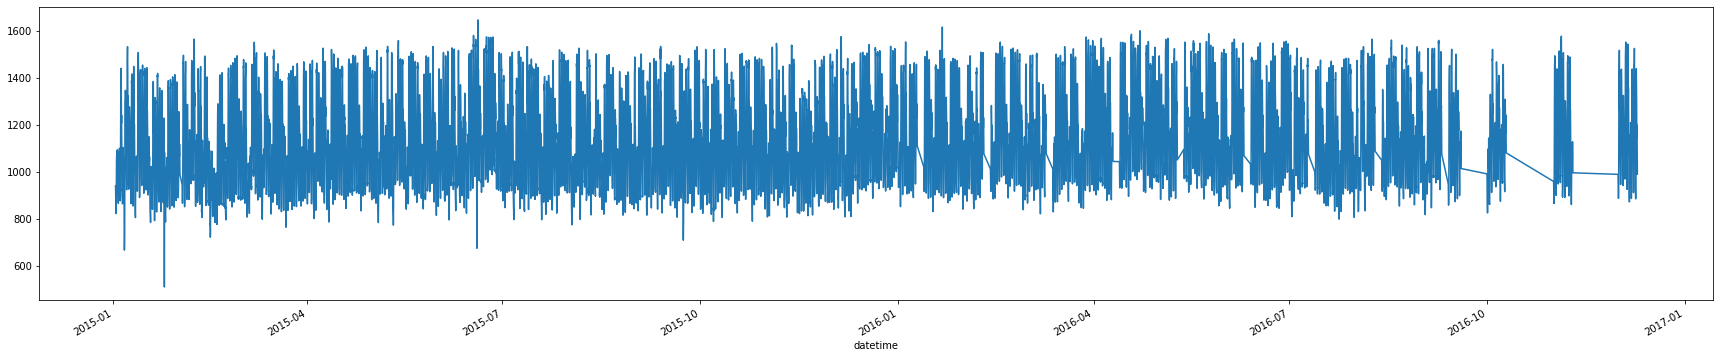

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6))
ddd=df[0:15000]
ddd.groupby('datetime')['nat_demand'].median().plot()

I think we have reasonable insights to create a model. You may further to the EDA to find more insghts if you want..

# Data Preprocessing

In [16]:
def add_features(df):
    df['T2M_toc_s']=df['T2M_toc'].shift(-1).fillna(0)
    df['QV2M_toc_s']=df['QV2M_toc'].shift(-1).fillna(0)
    df['TQL_toc_s']=df['TQL_toc'].shift(-1).fillna(0)
    df['W2M_toc_s']=df['W2M_toc'].shift(-1).fillna(0)
    df['T2M_toc_s']=df['T2M_san'].shift(-1).fillna(0)
    df['QV2M_san_s']=df['QV2M_san'].shift(-1).fillna(0)
    df['TQL_san_s']=df['TQL_san'].shift(-1).fillna(0)
    df['W2M_san_s']=df['W2M_san'].shift(-1).fillna(0)
    df['T2M_dav_s']=df['T2M_dav'].shift(-1).fillna(0)
    df['QV2M_dav_s']=df['QV2M_dav'].shift(-1).fillna(0)
    df['TQL_dav_s']=df['TQL_dav'].shift(-1).fillna(0)
    df['W2M_dav_s']=df['W2M_dav'].shift(-1).fillna(0)
    df['Holiday_ID_s']=df['Holiday_ID'].shift(-1).fillna(0)
    df['holiday_s']=df['holiday'].shift(-1).fillna(0)
    df['school_s']=df['school'].shift(-1).fillna(0)
    
    df['T2M_toc_s1']=df['T2M_toc'].shift(-2).fillna(0)
    df['QV2M_toc_s1']=df['QV2M_toc'].shift(-2).fillna(0)
    df['TQL_toc_s1']=df['TQL_toc'].shift(-2).fillna(0)
    df['W2M_toc_s1']=df['W2M_toc'].shift(-2).fillna(0)
    df['T2M_toc_s1']=df['T2M_san'].shift(-2).fillna(0)
    df['QV2M_san_s1']=df['QV2M_san'].shift(-2).fillna(0)
    df['TQL_san_s1']=df['TQL_san'].shift(-2).fillna(0)
    df['W2M_san_s1']=df['W2M_san'].shift(-2).fillna(0)
    df['T2M_dav_s1']=df['T2M_dav'].shift(-2).fillna(0)
    df['QV2M_dav_s1']=df['QV2M_dav'].shift(-2).fillna(0)
    df['TQL_dav_s1']=df['TQL_dav'].shift(-2).fillna(0)
    df['W2M_dav_s1']=df['W2M_dav'].shift(-2).fillna(0)
    
    df['nat_demand3']=df['nat_demand'].shift(3).fillna(0)
    df['nat_demand4']=df['nat_demand'].shift(4).fillna(0)
    df['nat_demand5']=df['nat_demand'].shift(5).fillna(0)
    df['nat_demand6']=df['nat_demand'].shift(6).fillna(0)
    df['nat_demand7']=df['nat_demand'].shift(7).fillna(0)
    df['nat_demand8']=df['nat_demand'].shift(8).fillna(0)
    df['nat_demand9']=df['nat_demand'].shift(9).fillna(0)
    df['nat_demand10']=df['nat_demand'].shift(10).fillna(0)
    df['nat_demand11']=df['nat_demand'].shift(11).fillna(0)
    df['nat_demand12']=df['nat_demand'].shift(12).fillna(0)
    df['nat_demand13']=df['nat_demand'].shift(13).fillna(0)
    df['nat_demand14']=df['nat_demand'].shift(14).fillna(0)
    df['nat_demand_n']=df['nat_demand']  
    #df = pd.get_dummies(df)
    return df

In [17]:
df1 = add_features(df)

In [18]:
col=['datetime','nat_demand']
new_df= df1.drop(columns=col)
df_for_training = new_df.astype(float)
df_for_training.head(10)

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,nat_demand6,nat_demand7,nat_demand8,nat_demand9,nat_demand10,nat_demand11,nat_demand12,nat_demand13,nat_demand14,nat_demand_n
0,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,...,0.0000,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,970.3450
1,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,...,0.0000,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,912.1755
2,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,...,0.0000,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,900.2688
3,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,...,0.0000,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,889.9538
4,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,...,0.0000,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,893.6865
5,26.034143,0.019080,0.014542,20.062038,22.995081,0.017028,0.001485,9.087273,22.456018,0.016410,...,0.0000,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,879.2323
6,26.691492,0.019332,0.006645,21.623496,24.285242,0.017424,0.002176,11.395393,22.949304,0.016570,...,970.3450,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,932.4876
7,27.674066,0.019370,0.006863,23.775317,26.189691,0.018073,0.004539,12.872866,24.088129,0.016677,...,912.1755,970.3450,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1048.9720
8,28.760400,0.019171,0.010231,24.636152,27.916650,0.018454,0.004292,14.548027,25.479150,0.016646,...,900.2688,912.1755,970.3450,0.000,0.0,0.0,0.0,0.0,0.0,1167.9074
9,29.766656,0.018759,0.009018,25.862671,29.172906,0.018675,0.004921,15.081688,26.704156,0.016608,...,889.9538,900.2688,912.1755,970.345,0.0,0.0,0.0,0.0,0.0,1257.5069


Scaling of data is required....

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
df_for_training_scaled

# The Most Important part...
Now, for this perticular dataset the past values of the records are import to predict the future demand and the Model has to be dynamic to learn from past data and predict the future demand.

- For this, we have to create parts of data having past 2 days (48 hours)of the data to give it the same to the LSTM model to predict the 49th Hour Load prediction.

I hope I clear, if not please ask me in discussion I will clear your doubt. This is the most import part of the this Notebook

In [ ]:
X=np.array(df_for_training)
print(X)

In [ ]:
trainX = []
trainY = []
trainY = df_for_training['nat_demand_n'].to_numpy().reshape(-1,1)
trainX = df_for_training.to_numpy().reshape(-1, 57,1)
#trainY = df[['pressure']].to_numpy().reshape(-1, 80)
#trainX = df.reshape(-1, 80, df.shape[-1])      df_for_training.shape[-1]

In [ ]:
#trainX = []
#trainY = []
#n_future = 1 
#n_past = 48
#for i in range(n_past, len(df_for_training_scaled) - n_future +1):
#    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
#    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

Convert it to Numpy array....Think why >>>

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)
print(trainX.shape)
print(trainY.shape)

In [ ]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=2000)
#p = PrintArray(precision=4, linewidth=150, suppress=True)
trainX

# Creating a LSTM Multivariant model 

Now, we have to create a multi stage Nuetral network -LSTM (Long Short Term Memory) moedel. 
The Modem will have the return sequence True to understand the sequncing of the data and identify the pattern. Hope it works the fine.

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True)))
                             #return_sequences=True))
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
#model.add(LSTM(64, activation='relu', return_sequences=True))
#model.add(Bidirectional(LSTM(24, activation='relu', return_sequences=False)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))#, return_sequences=False))
#model.add(Dense(32, activation='relu'))#, return_sequences=False))
model.add(Dense(8, activation='relu'))#, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
#model.summary()

# Train the Model

In [ ]:
history = model.fit(trainX, trainY, epochs=5, batch_size=200,verbose=1)
#validation_split=0.2,
plt.plot(history.history['loss'], label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Model has performed well on validation data...
Now, make ready the Test data set ready for prediction Jan-2020

In [ ]:
df_test= pd.read_csv('/kaggle/input/panama-electricity-load-forecasting/Test_Jan.csv',encoding="latin-1")
df_test['datetime']=pd.to_datetime(df_test['datetime'])
df_test['week_day']=df_test['datetime'].dt.dayofweek
df_test['date']=df_test['datetime'].dt.day
df_test['month']=df_test['datetime'].dt.month
df_test['hour']=df_test['datetime'].dt.hour
df_test = add_features(df_test)
df_for_pred=df_test.drop(columns=col)
df_for_pred.astype(float)
df_pred_scaled=scaler.transform(df_for_pred)

X_pred = []
for i in range(n_past, len(df_pred_scaled) - n_future +1):
    X_pred.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
X_pred= np.array(X_pred)

print('X for prediction shape == {}.'.format(X_pred.shape))

# Make a Prediction

As you can see, values are not in the format in which we required.
We have to do the inverse Transform..

In [ ]:
prediction = model.predict(X_pred) 
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
y_pred_future
df_forecast=[]
df_forecast = pd.DataFrame(y_pred_future)
temp_df=[]
temp_df=pd.DataFrame(np.zeros(n_past))
df_forecast =pd.concat([temp_df,df_forecast], ignore_index=True)
df_forecast
df_actual= pd.read_csv('/kaggle/input/panama-electricity-load-forecasting/Predict_Jan.csv',encoding="latin-1")
df_actual['Pred_nat_demand']=df_forecast
df_actual = df_actual.iloc[n_past:]
df_actual
a4_dims = (25,8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(df_actual['datetime'], df_actual['nat_demand'])
sns.lineplot(df_actual['datetime'], df_actual['Pred_nat_demand'])

In [ ]:
prediction = model.predict(X_pred) 
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
y_pred_future
df_forecast=[]
df_forecast = pd.DataFrame(y_pred_future)
temp_df=[]
temp_df=pd.DataFrame(np.zeros(n_past))
df_forecast =pd.concat([temp_df,df_forecast], ignore_index=True)
df_forecast
df_actual= pd.read_csv('/kaggle/input/panama-electricity-load-forecasting/Predict_Jan.csv',encoding="latin-1")
df_actual['Pred_nat_demand']=df_forecast
df_actual = df_actual.iloc[n_past:]
df_actual
a4_dims = (25,8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(df_actual['datetime'], df_actual['nat_demand'])
sns.lineplot(df_actual['datetime'], df_actual['Pred_nat_demand'])

In [ ]:
df_forecast
#df_forecast